In [224]:
#Exercise 1: Logistic regression with Scikit-learn
import numpy as np
from sklearn.linear_model import LogisticRegression
X = np.array([[0],[0.1],[0.2], [1],[1.1],[1.2], [1.3]])
y = np.array([0,0,0,1,1,1,0])

model=LogisticRegression()
model.fit(X,y)

x_pred = np.array([[0.5]])
y_pred=model.predict_proba(x_pred)

#question 1
print("Predicted class for x_pred = [[0.5]]:", model.predict(x_pred))
#question 2
print("Predicted probabilities for x_pred = [[0.5]]:", y_pred) 

#question 3
print("Coef_=",round(model.coef_[0,0],2))
print("Intercept=",round(model.intercept_[0],2))
print("Score=", round(model.score(X,y),2))






Predicted class for x_pred = [[0.5]]: [0]
Predicted probabilities for x_pred = [[0.5]]: [[0.61450206 0.38549794]]
Coef_= 0.82
Intercept= -0.88
Score= 0.71


Text(0.5, 0, 'x')

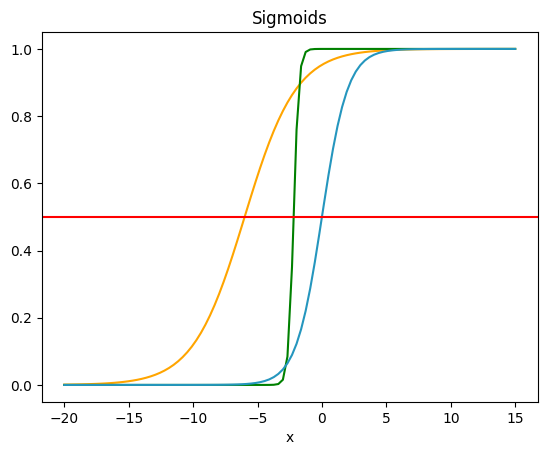

In [256]:
#Exercise 2: Sigmoid
from matplotlib import pyplot as plt

x=np.linspace(-20,15,100)

sigma=1/(1+ np.exp(-x ))
sigma1=1/(1+ np.exp(-(0.5*x + 3)))
sigma2=1/(1+ np.exp(-(5*x + 11)))

plt.plot(x,sigma1,c='orange')
plt.plot(x,sigma2,c='g')
plt.plot(x,sigma,c='#2596be')
plt.axhline(0.5,c='r')
plt.title('Sigmoids')
plt.xlabel('x')





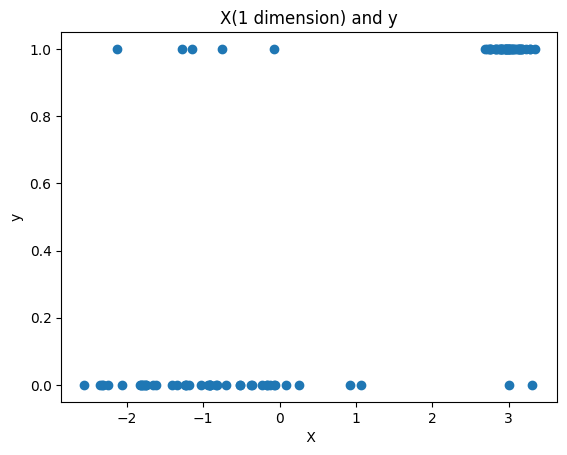

In [255]:
#Exercise 3: Decision boundary
#Question1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 

# Генерация данных
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5, 0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

# Визуализация точек данных
plt.scatter(X, y)
plt.xlabel(' X')
plt.ylabel('y')
plt.title('X(1 dimension) and y')
plt.show()


In [235]:
#Question2

clf = LogisticRegression()
clf.fit(X, y)


print(f"Intercept: {clf.intercept_[0]:.4f}")
print(f"Coef: {clf.coef_[0][0]:.4f}")


Intercept: -0.9850
Coef: 1.1889


C:\Users\Alex Shtanko\AppData\Local\Temp\ipykernel_23420\2215862225.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


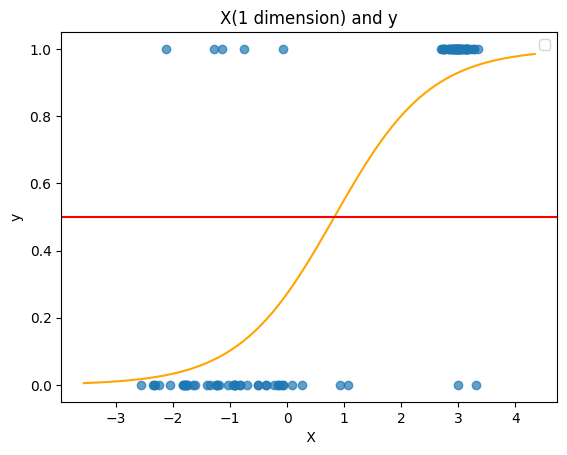

In [237]:
#Question3
x_vals = np.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)
y_vals = clf.predict_proba(x_vals)[:, 1]  # Вероятности принадлежности классу 1


plt.plot(x_vals, y_vals, 'orange')


plt.axhline(y=0.5, color='r')

plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.scatter(X, y, alpha=0.7)
plt.xlabel(' X')
plt.ylabel('y')
plt.title('X(1 dimension) and y')
plt.show()




In [242]:
#The question 4
def predict_probability(coefs, X):
    """
    coefs is a list that contains the coefficient and intercept: [coef, intercept]
    X is the features set (input data)
    
    Returns probability of X
    """
    coef, intercept = coefs
    # Calculate the probability using the logistic regression formula
    probabilities = 1 / (1 + np.exp(-(coef * X + intercept)))
    return probabilities

# Compare with scikit-learn's predict_proba
coefs = [clf.coef_[0][0], clf.intercept_[0]]
prob_custom = predict_probability(coefs, X)
prob_sklearn = clf.predict_proba(X)[:, 1]

print(f"Custom probabilities:\n {list(map(float, prob_custom))[:5]}")
print(f"Scikit-learn probabilities:\n {prob_sklearn[:5]}")



Custom probabilities:
 [0.16838474223216573, 0.938078758499765, 0.08040987561326166, 0.920797049607399, 0.935176950775604]
Scikit-learn probabilities:
 [0.16838474 0.93807876 0.08040988 0.92079705 0.93517695]


C:\Users\Alex Shtanko\AppData\Local\Temp\ipykernel_23420\4131300845.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Custom probabilities:\n {list(map(float, prob_custom))[:5]}")


In [249]:
#The question 5
def predict_class(coefs, X):
    """
    coefs is a list that contains the coefficient and intercept: [coef, intercept]
    X is the features set (input data)
    
    Returns predicted class (0 or 1)
    """
    probabilities = predict_probability(coefs, X)
    return [1 if p >= 0.5 else 0 for p in probabilities]

# Compare with scikit-learn's predict
pred_class_custom = predict_class(coefs, X)
pred_class_sklearn = clf.predict(X)

print(f"Custom predicted classes:\n {pred_class_custom[:5]}")
print(f"Scikit-learn predicted classes:\n {[int(x) for x in pred_class_sklearn[:5]]}")


Custom predicted classes:
 [0, 1, 0, 1, 1]
Scikit-learn predicted classes:
 [0, 1, 0, 1, 1]


C:\Users\Alex Shtanko\AppData\Local\Temp\ipykernel_23420\1265203670.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


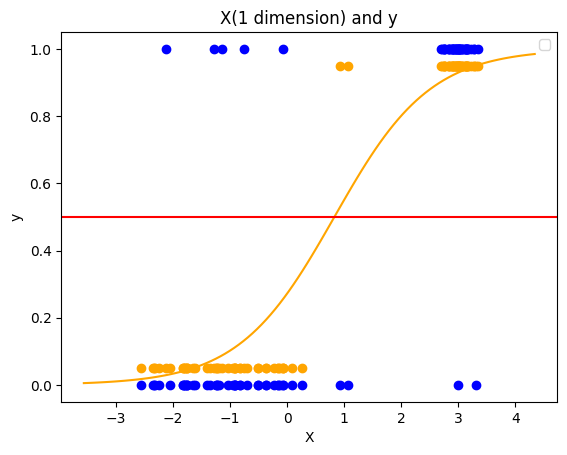

In [250]:
#The question 6
# Plot data and predicted class
shifted_pred_class = [p - 0.05 if p == 1 else p + 0.05 for p in pred_class_custom]


plt.scatter(X, y, color='b')
plt.scatter(X, shifted_pred_class, color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('X(1 dimension) and y')
plt.plot(x_vals, y_vals, 'orange')
plt.axhline(y=0.5, color='r')
plt.legend()
plt.show()


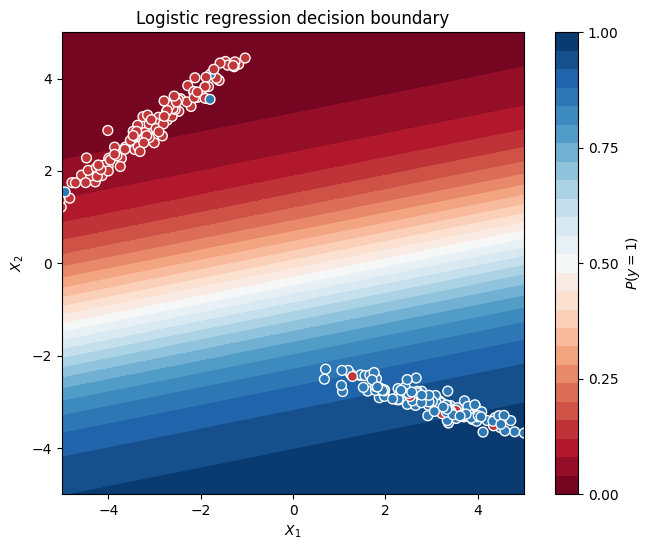

In [251]:
#The question 7

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)


clf = LogisticRegression()
clf.fit(X, y)


xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]


probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))


contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
plt.title('Logistic regression decision boundary')
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

#
ax.set(aspect="equal", xlim=(-5, 5), ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")

plt.show()


In [202]:
# Exercise 4
# question 1 

from sklearn.model_selection import train_test_split
import numpy as np

X = np.arange(1,21).reshape(10,-1)
y = np.zeros(10)
y[7:] = 1

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,shuffle=False)
print("X_train:\n",X_train,"\n" "\n y_train:\n",y_train,"\n") 
print("X_test:\n",X_test,"\n" "\n y_test:\n",y_test) 






X_train:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]] 

 y_train:
 [0. 0. 0. 0. 0. 0. 0. 1.] 

X_test:
 [[17 18]
 [19 20]] 

 y_test:
 [1. 1.]


In [252]:
# question 2
X = np.arange(1,201).reshape(100,-1)
y = np.zeros(100)
y[70:] = 1

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)


train_class1_proportion = np.mean(y_train) 
test_class1_proportion = np.mean(y_test) 

print("Proportion of class 1 in test set:", test_class1_proportion)

print("Proportion of class 1 in training set:", train_class1_proportion) 


Proportion of class 1 in test set: 0.3
Proportion of class 1 in training set: 0.3


In [253]:
#Exercise 4: Train test split

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Загрузка данных
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]


df = pd.read_csv("breast-cancer-wisconsin.csv", header=None, names=column_names)


df.replace('?', pd.NA, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col])
df.fillna(df.median(), inplace=True)


df.drop(columns=["Sample code number"], inplace=True)


class_counts = df["Class"].value_counts()
benign_proportion = class_counts[2] / df.shape[0]
print(f"Proportion of Benign cases: {benign_proportion:.4f}")
print(f"Accuracy if always predicting Benign: {benign_proportion:.4f}")


X = df.drop(columns=["Class"])
y = df["Class"].replace({2: 0, 4: 1})  # Benign (2) -> 0, Malignant (4) -> 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)


print(f"Proportion of Benign in train set: {y_train.value_counts()[0] / len(y_train):.4f}")
print(f"Proportion of Benign in test set: {y_test.value_counts()[0] / len(y_test):.4f}")

model = LogisticRegression(random_state=43)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]  # Вероятности для класса 1 (Malignant)


y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1 (Malignant)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print("\n# Train")
print("Class prediction on train set:")
print(y_train_pred[:10])

print("\nProbability prediction on train set:")
print(y_train_proba[:10])

print("\nScore on train set:")
print(train_accuracy)


print("\n# Test")
print("Class prediction on test set:")
print(y_test_pred[:10])

print("\nProbability prediction on test set:")
print(y_test_proba[:10])

print("\nScore on test set:")
print(test_accuracy)


train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion matrix for train set:")
print(train_cm)

print("\nConfusion matrix for test set:")
print(test_cm)



Proportion of Benign cases: 0.6552
Accuracy if always predicting Benign: 0.6552
Proportion of Benign in train set: 0.6547
Proportion of Benign in test set: 0.6571

# Train
Class prediction on train set:
[1 0 1 0 0 0 0 1 0 0]

Probability prediction on train set:
[0.99600525 0.00908951 0.99992741 0.00528932 0.02098032 0.00582947
 0.03566504 0.99515453 0.00788556 0.01065907]

Score on train set:
0.9695885509838998

# Test
Class prediction on test set:
[0 0 0 1 0 1 0 0 0 1]

Probability prediction on test set:
[0.01747894 0.22504709 0.00699085 0.54019127 0.00152929 0.9986223
 0.33611399 0.01228123 0.00438318 0.99972361]

Score on test set:
0.9642857142857143

Confusion matrix for train set:
[[357   9]
 [  8 185]]

Confusion matrix for test set:
[[90  2]
 [ 3 45]]
